In [1]:
from graph_tool.all import *
import pickle
import time
import os

In [2]:
from GithubGraphML.parsing.loading import load_csv_graph, load_csv_vertices, combine_graphs, transform_bipartite
data_dir = './data'
lang = 'Pascal'

# Bipartide Creation Test

In [3]:
G = Graph(directed=False)
G.vp['id'] = G.new_vp('string')
G.vp['prop'] = G.new_vp('string')
G.ep['class'] = G.new_ep('string')
G.ep['class'][G.add_edge(0, 1)] = '1'
G.ep['class'][G.add_edge(1, 2)] = '2'
G.ep['class'][G.add_edge(0, 2)] = '1'
G.ep['class'][G.add_edge(0, 3)] = '2'
G.ep['class'][G.add_edge(4, 5)] = '1'
G.ep['class'][G.add_edge(4, 6)] = '2'
G.ep['class'][G.add_edge(1, 7)] = '1'
for v in G.vertices(): G.vp['id'][v] = str(v)
for v in G.vertices(): G.vp['prop'][v] = chr(ord('a') + int(v))

V = Graph(3)
V.vp['class'] = V.new_vp('string', vals=['1', '2', '3'])
V.vp['id'] = V.new_vp('string', vals=['p', 'q', 'r'])

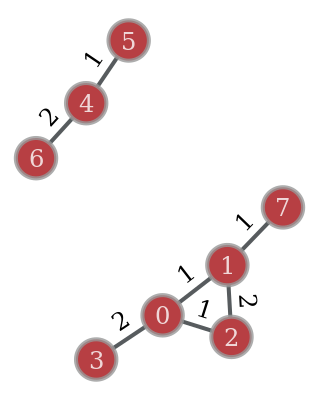

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fd1d0745e70, at 0x7fd1d07442e0>

In [4]:
graph_draw(G, output_size = (200, 200), vertex_text=G.vp['id'], edge_text=G.ep['class'])

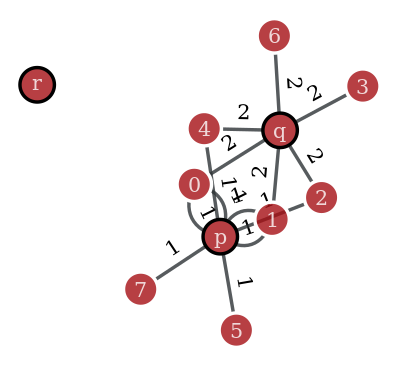

True

In [5]:
transform_bipartite(G, V, 'class')
graph_draw(G, output_size = (200, 200), vertex_text=G.vp['id'], edge_text=G.ep['class'], vertex_color=G.vp['bipartite'])
is_bipartite(G)

# Test On Real Graph

In [6]:
start_time = time.time()
G, vp = load_csv_graph(f"{data_dir}/developers_social_network/{lang.upper()}_developers_social_network.csv", (1, 2), vprop_name='repository_id')
G.ep['language'] = G.new_ep('string', val=lang)
G.set_directed(False)
end_time = time.time()
print('runtime:', end_time - start_time)
G

runtime: 0.14276361465454102


<Graph object, undirected, with 4241 vertices and 12008 edges, 1 internal vertex property, 6 internal edge properties, at 0x7fd1d07471c0>

In [7]:
start_time = time.time()
with open('repositories.pkl', 'rb') as f:
    V = pickle.load(f)
end_time = time.time()
print('runtime:', end_time - start_time)
V

runtime: 12.848215818405151


<Graph object, directed, with 8556778 vertices and 0 edges, 10 internal vertex properties, at 0x7fd1d0744520>

In [8]:
# Then continue with the rest
start_time = time.time()
transform_bipartite(G, V, 'repository_id')
end_time = time.time()
print('runtime:', end_time - start_time)
G

runtime: 548.004885673523


<Graph object, undirected, with 8561019 vertices and 24016 edges, 11 internal vertex properties, 6 internal edge properties, at 0x7fd1d07471c0>

In [9]:
is_bipartite(G)

True